#  ​Decode 9.1 (Python Hackathon) 
## Name- Raj Jadhav
## Batch- DS20AUG03


### Problem Statement: AJ Ecom Pvt Ltd is one of the leading business who have supermarkets across different regions of India. They want to understand the performance of their supermarket in terms of customers, products and its sale. 

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing & Merging The Datasets

In [195]:
df1=pd.read_csv('Customer.csv')

In [196]:
df1.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [197]:
df1.tail()

,customer_Id,DOB,Gender,city_code
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0
5646,274308,29-12-1992,F,5.0


In [198]:
df2=pd.read_csv('Transactions.csv')

In [199]:
df2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [200]:
df2.rename(columns={'cust_id':'customer_Id'},inplace=True)

In [201]:
df2.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [202]:
df3=pd.merge(df1,df2,on='customer_Id')

In [203]:
df3.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [204]:
df3.tail()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
23048,269626,27-12-1992,F,5.0,71369029396,18-10-2011,12,6,1,638,66.99,704.99,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.57,3573.57,MBR
23050,274308,29-12-1992,F,5.0,26208690928,22-10-2012,1,2,2,898,188.58,1984.58,MBR
23051,274308,29-12-1992,F,5.0,57358822237,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop
23052,274308,29-12-1992,F,5.0,58160544337,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop


In [205]:
df4=pd.read_csv('prod_cat_info.csv')

In [206]:
df4.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [207]:
df4.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [208]:
df4.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [209]:
DF=pd.merge(df3,df4,on='prod_subcat_code')

In [210]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,5,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,5,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,Fiction


In [211]:
DF.tail()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
57161,272141,02-12-1992,F,10.0,79059585885,25-10-2012,5,3,2,1354,284.340,2992.340,e-Shop,3,Electronics,Computers
57162,269719,04-12-1992,F,8.0,70553332101,23-11-2013,5,3,2,623,130.830,1376.830,Flagship store,3,Electronics,Computers
57163,275051,04-12-1992,M,5.0,77933614379,18-05-2013,5,3,5,1095,574.875,6049.875,e-Shop,3,Electronics,Computers
57164,270695,05-12-1992,F,6.0,2300510157,20-11-2012,5,3,3,906,285.390,3003.390,TeleShop,3,Electronics,Computers
57165,270476,25-12-1992,F,3.0,85475160771,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,3,Electronics,Computers


In [212]:
DF.drop('prod_cat_code_y',axis=1,inplace=True)

In [213]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [214]:
DF.rename(columns={'prod_cat_code_x':'prod_cat_code'},inplace=True)

In [215]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [216]:
DF.shape

(57166, 15)

In [217]:
DF.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,57166.000000,57151.000000,5.716600e+04,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000
mean,271015.375101,5.496457,5.017556e+10,5.613949,3.462425,2.429766,635.022653,248.967409,2102.084532
std,2426.954106,2.865186,2.896442e+10,3.701183,1.710811,2.273219,623.390431,187.344788,2516.597510
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268931.000000,3.000000,2.527880e+10,3.000000,2.000000,1.000000,312.000000,98.490000,764.660000
50%,270982.000000,5.000000,5.019132e+10,4.000000,3.000000,3.000000,709.000000,199.342500,1759.160000
75%,273096.000000,8.000000,7.551116e+10,10.000000,5.000000,4.000000,1109.000000,364.980000,3553.680000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


## Checking the null values

In [218]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57166 entries, 0 to 57165
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       57166 non-null  int64  
 1   DOB               57166 non-null  object 
 2   Gender            57144 non-null  object 
 3   city_code         57151 non-null  float64
 4   transaction_id    57166 non-null  int64  
 5   tran_date         57166 non-null  object 
 6   prod_subcat_code  57166 non-null  int64  
 7   prod_cat_code     57166 non-null  int64  
 8   Qty               57166 non-null  int64  
 9   Rate              57166 non-null  int64  
 10  Tax               57166 non-null  float64
 11  total_amt         57166 non-null  float64
 12  Store_type        57166 non-null  object 
 13  prod_cat          57166 non-null  object 
 14  prod_subcat       57166 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 7.0+ MB


In [219]:
DF.isnull().sum()

customer_Id          0
DOB                  0
Gender              22
city_code           15
transaction_id       0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_subcat          0
dtype: int64

In [220]:
DF[DF['Gender'].isnull()]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
9,267199,14-02-1970,NaN,2.0,56749259881,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction
1079,267199,14-02-1970,NaN,2.0,85496594077,27-11-2013,1,1,-4,-366,153.720,-1617.720,e-Shop,Clothing,Women
1080,267199,14-02-1970,NaN,2.0,85496594077,27-11-2013,1,1,-4,-366,153.720,-1617.720,e-Shop,Footwear,Mens
1081,267199,14-02-1970,NaN,2.0,85496594077,27-11-2013,1,1,-4,-366,153.720,-1617.720,e-Shop,Bags,Mens
1082,267199,14-02-1970,NaN,2.0,85496594077,24-11-2013,1,1,4,366,153.720,1617.720,e-Shop,Clothing,Women
1083,267199,14-02-1970,NaN,2.0,85496594077,24-11-2013,1,1,4,366,153.720,1617.720,e-Shop,Footwear,Mens
1084,267199,14-02-1970,NaN,2.0,85496594077,24-11-2013,1,1,4,366,153.720,1617.720,e-Shop,Bags,Mens
10016,271626,02-06-1970,NaN,6.0,51951874983,20-12-2012,10,5,4,845,354.900,3734.900,TeleShop,Electronics,Audio and video
10017,271626,02-06-1970,NaN,6.0,51951874983,20-12-2012,10,5,4,845,354.900,3734.900,TeleShop,Books,Non-Fiction
10018,271626,02-06-1970,NaN,6.0,51951874983,20-12-2012,10,5,4,845,354.900,3734.900,TeleShop,Home and kitchen,Kitchen


In [221]:
DF[DF['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
1220,268447,14-07-1970,M,NaN,86339422638,31-12-2012,1,4,1,238,24.990,262.990,Flagship store,Clothing,Women
1221,268447,14-07-1970,M,NaN,86339422638,31-12-2012,1,4,1,238,24.990,262.990,Flagship store,Footwear,Mens
1222,268447,14-07-1970,M,NaN,86339422638,31-12-2012,1,4,1,238,24.990,262.990,Flagship store,Bags,Mens
10061,268447,14-07-1970,M,NaN,81458995048,26-08-2013,10,5,1,850,89.250,939.250,e-Shop,Electronics,Audio and video
10062,268447,14-07-1970,M,NaN,81458995048,26-08-2013,10,5,1,850,89.250,939.250,e-Shop,Books,Non-Fiction
10063,268447,14-07-1970,M,NaN,81458995048,26-08-2013,10,5,1,850,89.250,939.250,e-Shop,Home and kitchen,Kitchen
10118,268709,09-09-1970,F,NaN,59692455676,30-06-2011,10,3,4,1024,430.080,4526.080,TeleShop,Electronics,Audio and video
10119,268709,09-09-1970,F,NaN,59692455676,30-06-2011,10,3,4,1024,430.080,4526.080,TeleShop,Books,Non-Fiction
10120,268709,09-09-1970,F,NaN,59692455676,30-06-2011,10,3,4,1024,430.080,4526.080,TeleShop,Home and kitchen,Kitchen
34897,268447,14-07-1970,M,NaN,50093131361,3/5/2013,9,3,5,879,461.475,4856.475,TeleShop,Electronics,Cameras


#### As city code and gender are the key parameters drop the record where these two are null

## Droping The Null Values

In [222]:
DF.dropna(subset=['Gender'],inplace=True)

In [223]:
DF[DF['Gender'].isnull()]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat


In [224]:
DF.dropna(subset=['city_code'],inplace=True)

In [225]:
DF[DF['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat


In [226]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57129 entries, 0 to 57165
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       57129 non-null  int64  
 1   DOB               57129 non-null  object 
 2   Gender            57129 non-null  object 
 3   city_code         57129 non-null  float64
 4   transaction_id    57129 non-null  int64  
 5   tran_date         57129 non-null  object 
 6   prod_subcat_code  57129 non-null  int64  
 7   prod_cat_code     57129 non-null  int64  
 8   Qty               57129 non-null  int64  
 9   Rate              57129 non-null  int64  
 10  Tax               57129 non-null  float64
 11  total_amt         57129 non-null  float64
 12  Store_type        57129 non-null  object 
 13  prod_cat          57129 non-null  object 
 14  prod_subcat       57129 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 7.0+ MB


## Converting  the date in same format

In [227]:
DF.DOB=DF.DOB.str.replace('/','-')
DF.tran_date=DF.tran_date.str.replace('/','-')

In [228]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9-12-2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


## Removing the (-) sign from the Rate, Total Amount & Qty. Columns

In [229]:
DF['Rate']=DF.Rate.abs()
DF['total_amt']=DF.total_amt.abs()
DF['Qty']=DF.Qty.abs()

In [230]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9-12-2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [231]:
DF.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,57129.000000,57129.000000,5.712900e+04,57129.000000,57129.000000,57129.000000,57129.000000,57129.000000,57129.000000
mean,271016.648375,5.497033,5.017022e+10,5.613664,3.462445,3.010082,786.989182,248.988960,2620.312386
std,2426.808726,2.865319,2.896699e+10,3.700969,1.710746,1.418207,415.565474,187.359327,1971.733867
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000
25%,268934.000000,3.000000,2.527282e+10,3.000000,2.000000,2.000000,426.000000,98.490000,1036.490000
50%,270983.000000,5.000000,5.017763e+10,4.000000,3.000000,3.000000,789.000000,199.395000,2098.395000
75%,273099.000000,8.000000,7.551022e+10,10.000000,5.000000,4.000000,1150.000000,364.980000,3840.980000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


#### Data is clean now

## Gender-Wise Customers

In [232]:
DF.Gender.value_counts()

M    29180
F    27949
Name: Gender, dtype: int64

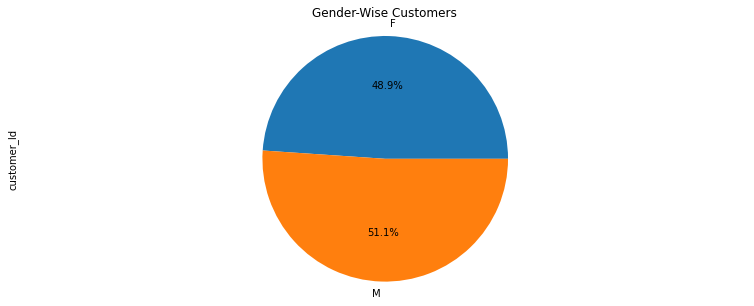

In [233]:
plt.figure(1,figsize=(13,5))
DF.groupby('Gender')['customer_Id'].count().plot.pie(autopct='%1.1f%%')
plt.title('Gender-Wise Customers')
plt.axis('equal')
plt.show()


#### Male Customers Are Greater Than Female Customers
#### Percentage of male and female customers is 51.1 and 48.9 respectively 

## Seperate The Dates

In [234]:
month=DF[['tran_date']]

In [235]:
month.head()

,tran_date
0,13-01-2014
1,25-03-2011
2,23-05-2011
3,9-12-2013
4,23-05-2013


In [236]:
month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57129 entries, 0 to 57165
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tran_date  57129 non-null  object
dtypes: object(1)
memory usage: 892.6+ KB


In [237]:
DF['tran_date']=pd.to_datetime(DF['tran_date'])

In [238]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57129 entries, 0 to 57165
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       57129 non-null  int64         
 1   DOB               57129 non-null  object        
 2   Gender            57129 non-null  object        
 3   city_code         57129 non-null  float64       
 4   transaction_id    57129 non-null  int64         
 5   tran_date         57129 non-null  datetime64[ns]
 6   prod_subcat_code  57129 non-null  int64         
 7   prod_cat_code     57129 non-null  int64         
 8   Qty               57129 non-null  int64         
 9   Rate              57129 non-null  int64         
 10  Tax               57129 non-null  float64       
 11  total_amt         57129 non-null  float64       
 12  Store_type        57129 non-null  object        
 13  prod_cat          57129 non-null  object        
 14  prod_subcat       5712

In [239]:
DF['tran_date'].dt.year

0        2014
1        2011
2        2011
3        2013
4        2013
         ... 
57161    2012
57162    2013
57163    2013
57164    2012
57165    2011
Name: tran_date, Length: 57129, dtype: int64

In [240]:
DF['tran_date'].dt.month

0         1
1         3
2         5
3         9
4         5
         ..
57161    10
57162    11
57163     5
57164    11
57165     9
Name: tran_date, Length: 57129, dtype: int64

In [241]:
DF['tran_date'].dt.day

0        13
1        25
2        23
3        12
4        23
         ..
57161    25
57162    23
57163    18
57164    20
57165     8
Name: tran_date, Length: 57129, dtype: int64

In [242]:
DF["tran_year"]=DF['tran_date'].dt.year
DF["tran_month"]=DF['tran_date'].dt.month
DF["tran_date"]=DF['tran_date'].dt.day

In [243]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,tran_year,tran_month
0,268408,02-01-1970,M,4.0,87243835584,13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,2014,1
1,275152,16-01-1970,M,4.0,73109425404,25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,2011,3
2,275034,18-01-1970,F,4.0,64777271023,23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,2011,5
3,270829,22-01-1970,F,8.0,87174343938,12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,2013,9
4,267657,29-01-1970,F,7.0,76242744953,23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,2013,5


## Storetype-Wise No. of Customers

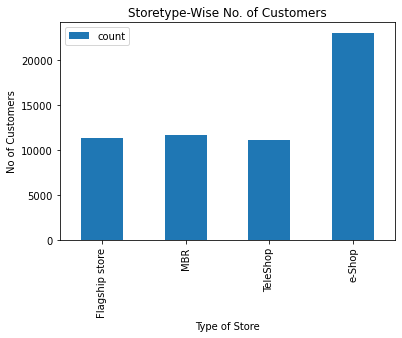

In [244]:
DF.groupby('Store_type')['customer_Id'].agg(['count']).plot.bar()
plt.title('Storetype-Wise No. of Customers')
plt.xlabel('Type of Store')
plt.ylabel('No of Customers')
plt.show();


#### From graph it is clear that customer prefer e shop for their shopping. There is huge difference between  e shop and other 3 storetype

## Total Sale

In [245]:
Total_Sale=DF.total_amt.sum()

In [246]:
Total_Sale

149695826.28

## Total Tax

In [247]:
Total_tax=DF.Tax.sum()

In [248]:
Total_tax

14224490.28

## CategoryWise No. of Customers


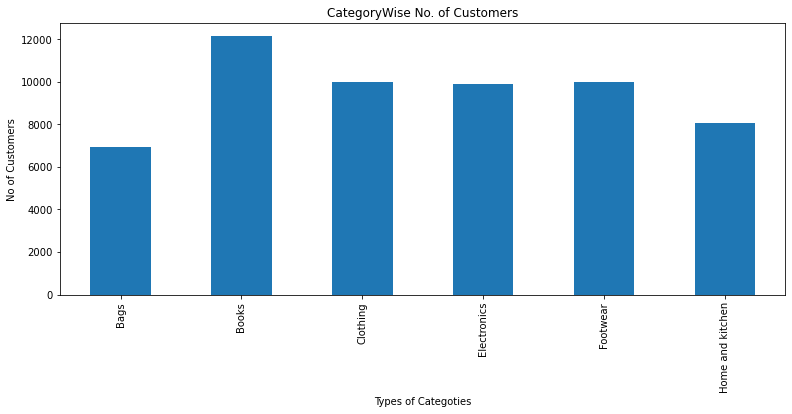

In [249]:
plt.figure(1,figsize=(13,5))
DF.groupby('prod_cat')['customer_Id'].count().plot.bar()
plt.title('CategoryWise No. of Customers')
plt.xlabel('Types of Categoties')
plt.ylabel('No of Customers')
plt.show()



#### Books category has more no. of customers & bags category has less no of customers as compare to other categories

In [250]:
date=DF[['DOB']]

In [251]:
date.head()

,DOB
0,02-01-1970
1,16-01-1970
2,18-01-1970
3,22-01-1970
4,29-01-1970


In [252]:
DF['DOB']=pd.to_datetime(DF['DOB'])

In [253]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57129 entries, 0 to 57165
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       57129 non-null  int64         
 1   DOB               57129 non-null  datetime64[ns]
 2   Gender            57129 non-null  object        
 3   city_code         57129 non-null  float64       
 4   transaction_id    57129 non-null  int64         
 5   tran_date         57129 non-null  int64         
 6   prod_subcat_code  57129 non-null  int64         
 7   prod_cat_code     57129 non-null  int64         
 8   Qty               57129 non-null  int64         
 9   Rate              57129 non-null  int64         
 10  Tax               57129 non-null  float64       
 11  total_amt         57129 non-null  float64       
 12  Store_type        57129 non-null  object        
 13  prod_cat          57129 non-null  object        
 14  prod_subcat       5712

In [254]:
DF["DOB_year"]=DF['DOB'].dt.year
DF["DOB_month"]=DF['DOB'].dt.month
DF["DOB_date"]=DF['DOB'].dt.day

In [255]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,tran_year,tran_month,DOB_year,DOB_month,DOB_date
0,268408,1970-02-01,M,4.0,87243835584,13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,2014,1,1970,2,1
1,275152,1970-01-16,M,4.0,73109425404,25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,2011,3,1970,1,16
2,275034,1970-01-18,F,4.0,64777271023,23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,2011,5,1970,1,18
3,270829,1970-01-22,F,8.0,87174343938,12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,2013,9,1970,1,22
4,267657,1970-01-29,F,7.0,76242744953,23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,2013,5,1970,1,29


## Rate Vs Tax

<Figure size 936x360 with 0 Axes>

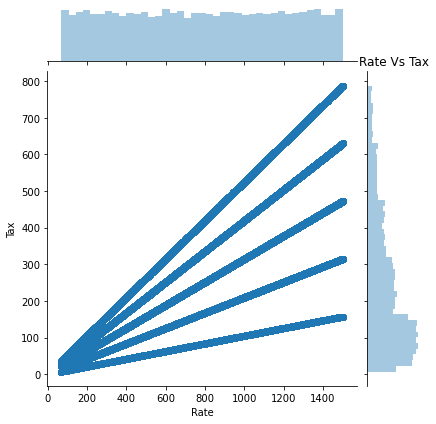

In [256]:
plt.figure(1,figsize=(13,5))
sns.jointplot(x='Rate',y='Tax',data=DF,kind='scatter')
plt.title('Rate Vs Tax');

#### Tax Is Directly Proportional to Rate

 ## Year-Wise No. of Customers

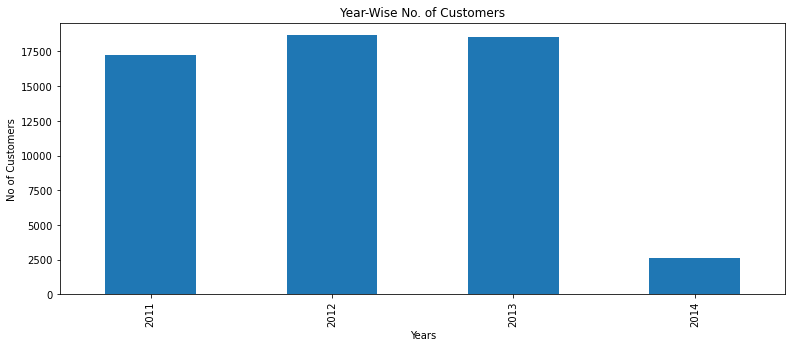

In [257]:
plt.figure(1,figsize=(13,5))
DF.groupby('tran_year')['customer_Id'].count().plot.bar()
plt.title('Year-Wise No. of Customers')
plt.xlabel('Years')
plt.ylabel('No of Customers')
plt.show();


#### According to data 2014 has less no. of customers till now 

## City-Wise No. of Customers

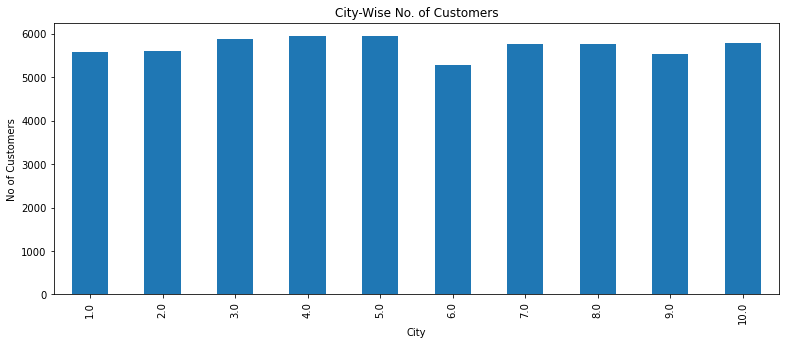

In [258]:
plt.figure(1,figsize=(13,5))
DF.groupby('city_code')['customer_Id'].count().plot.bar()
plt.title('City-Wise No. of Customers')
plt.xlabel('City')
plt.ylabel('No of Customers')
plt.show();


#### In cities there is no such big difference in no. of customers

## Year-Wise Sales

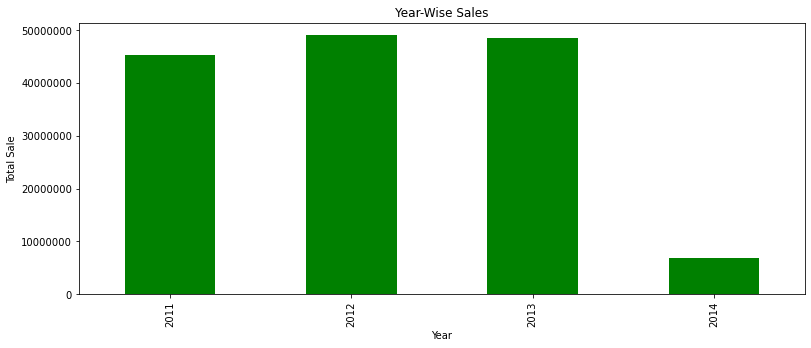

In [259]:
plt.figure(1,figsize=(13,5))
DATA=DF.groupby('tran_year')['total_amt'].sum().plot.bar(color="g")
plt.ticklabel_format(style='plain',axis='y')
plt.title('Year-Wise Sales')
plt.xlabel('Year')
plt.ylabel('Total Sale')
plt.show();


#### According to data 2014 has less sell till now

In [260]:
DF.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,tran_year,tran_month,DOB_year,DOB_month,DOB_date
0,268408,1970-02-01,M,4.0,87243835584,13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,2014,1,1970,2,1
1,275152,1970-01-16,M,4.0,73109425404,25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,2011,3,1970,1,16
2,275034,1970-01-18,F,4.0,64777271023,23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,2011,5,1970,1,18
3,270829,1970-01-22,F,8.0,87174343938,12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,2013,9,1970,1,22
4,267657,1970-01-29,F,7.0,76242744953,23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,2013,5,1970,1,29


## Sales By Age

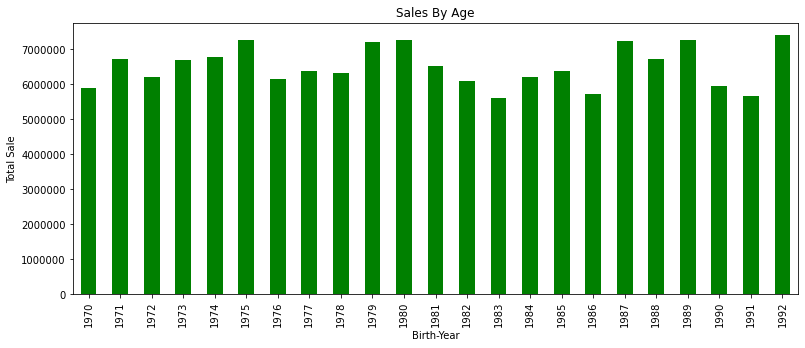

In [261]:
plt.figure(1,figsize=(13,5))
DATA=DF.groupby('DOB_year')['total_amt'].sum().plot.bar(color="g")
plt.ticklabel_format(style='plain',axis='y')
plt.title('Sales By Age')
plt.xlabel('Birth-Year')
plt.ylabel('Total Sale')
plt.show();


#### there is no huge difference in age wise sales 

## Category Wise Average Sales

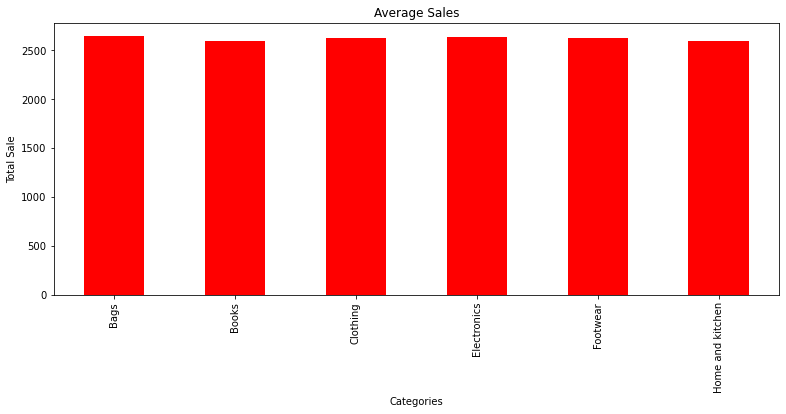

In [262]:
plt.figure(1,figsize=(13,5))
DATA=DF.groupby('prod_cat')['total_amt'].mean().plot.bar(color='r')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Average Sales')
plt.xlabel('Categories')
plt.ylabel('Total Sale')
plt.show();


#### Average sales is nearly same for all categories

## Sub-Category-wise Sales

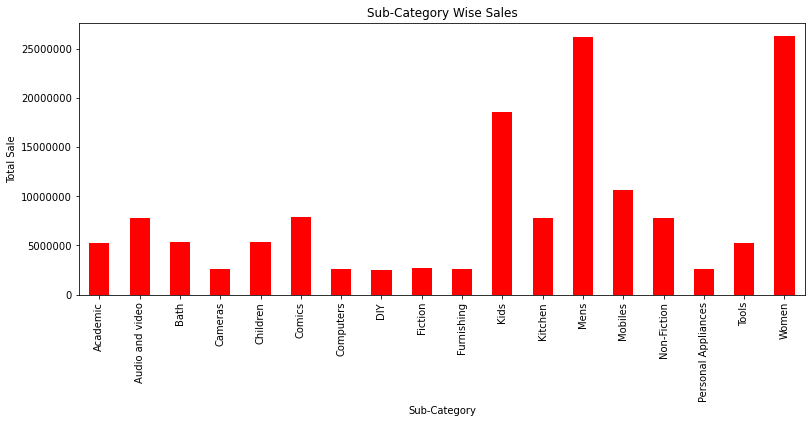

In [263]:
plt.figure(1,figsize=(13,5))
DATA=DF.groupby('prod_subcat')['total_amt'].sum().plot.bar(color='r')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Sub-Category Wise Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sale')
plt.show();


#### Personal Apllication Category Have less sales among all

# THANK YOU